In [1]:
import numpy as np
from pprint import pprint
import string
import matplotlib.pyplot as plt

import numpy as np
from traits import Traits
from climber import Climber, Team
from boulder import Boulder
from boulder import BoulderRound as Boulder_Round
from world_cup import WorldCup as World_Cup

In [2]:
team_size = 20
possible_names = []
for i in list(string.ascii_uppercase):
    for j in list(string.ascii_uppercase):
        possible_names.append(i+j)
USA = Team(team_size, names = possible_names[0:team_size])

n_world_cups = 100
cup_stats = []
for i in range(n_world_cups):
    brixen = World_Cup(USA.climbers, move_on=[12, 6])
    cup_stats.append(brixen.stats)

total_stats = {}

for key, value in cup_stats[0].items():
    total_stats[key] = {}
    for sub_key in value:
        total_stats[key][sub_key] = {}
        total_stats[key][sub_key]['values'] = [cup[key][sub_key] for cup in cup_stats]
        total_stats[key][sub_key]['mean'] = np.mean([cup[key][sub_key] for cup in cup_stats], axis=0)
        total_stats[key][sub_key]['std'] = np.std([cup[key][sub_key] for cup in cup_stats], axis=0)
        total_stats[key][sub_key]['min'] = np.min([cup[key][sub_key] for cup in cup_stats], axis=0)
        total_stats[key][sub_key]['max'] = np.max([cup[key][sub_key] for cup in cup_stats], axis=0)


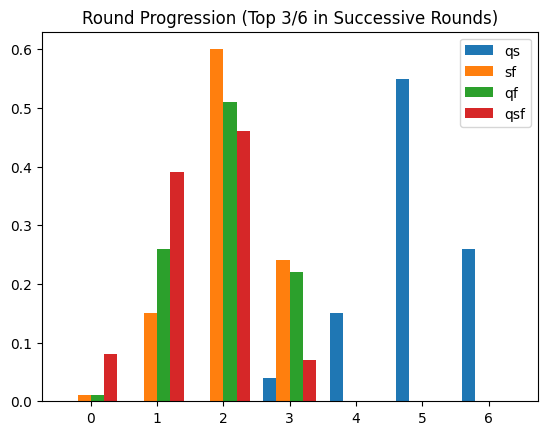

In [3]:
keys = ['qs', 'sf', 'qf', 'qsf']
plt.hist(
    x = [total_stats['progression'][key]['values'] for key in keys],
    bins = [x -.5 for x in list(range(0, 8))],
    density = True,
    label= keys
)
plt.legend()
plt.title("Round Progression (Top 3/6 in Successive Rounds)")
plt.show()

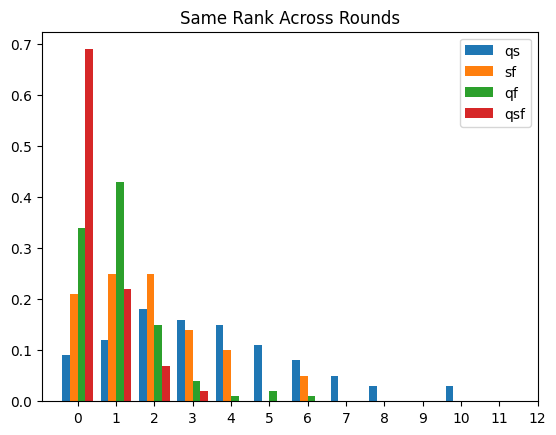

In [4]:
keys = ['qs', 'sf', 'qf', 'qsf']
plt.hist(
    x = [total_stats['same_rank'][key]['values'] for key in keys],
    bins = [x -.5 for x in list(range(0, 12))],
    density = True,
    label= keys
)
plt.legend()
plt.xticks(list(range(0, 13)))
plt.title("Same Rank Across Rounds")
plt.show()

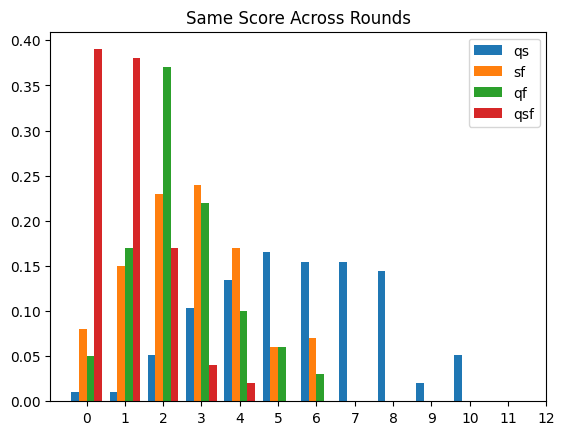

In [5]:
keys = ['qs', 'sf', 'qf', 'qsf']
plt.hist(
    x = [total_stats['same_score'][key]['values'] for key in keys],
    bins = [x -.5 for x in list(range(0, 12))],
    density = True,
    label= keys
)
plt.legend()
plt.xticks(list(range(0, 13)))
plt.title("Same Score Across Rounds")
plt.show()

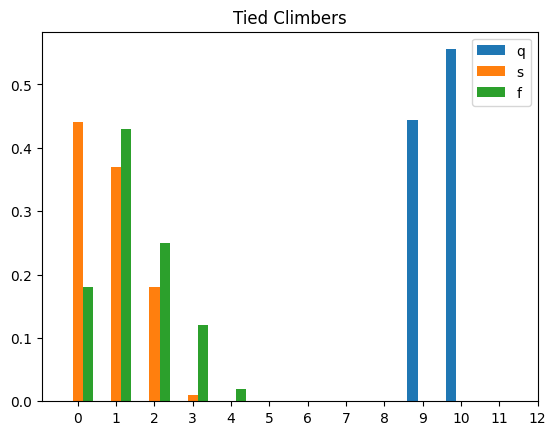

In [6]:
keys = ['q', 's', 'f']
plt.hist(
    x = [total_stats['tied'][key]['values'] for key in keys],
    bins = [x -.5 for x in list(range(0, 12))],
    density = True,
    label= keys
)
plt.legend()
plt.xticks(list(range(0, 13)))
plt.title("Tied Climbers")
plt.show()